## Playground Series - Season 3, Episode 10
### `Binary Classification with a Pulsar Dataset`

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Pulsar Classification. 
Objective is to predict the probability of Class
(whether the observation is a pulsar)

#### `Files`

- train.csv - the training dataset; Class is the (binary) target
- test.csv - the test dataset;
- sample_submission.csv - a sample submission file in the correct format



### `Data Science Framework & Process`

- Define the Problem
- Gather the Data
- Prepare Data for Consumption
- Perform Exploratory Analysis
- Model Data
- Validate and Implement Data Model
- Optimize and Strategize


### `Defining Our Problem`

`Predict the probability of the variable Class`

Pulsars are rapidly spinning neutron stars, extremely dense stars composed almost entirely of neutrons and having a diameter of only 20 km (12 miles) or less. Pulsar masses range between 1.18 and 1.97 times that of the Sun, but most pulsars have a mass 1.35 times that of the Sun.

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter . Neutron stars are very dense, and have short, regular rotational periods. This produces a very precise interval between pulses that ranges from milliseconds to seconds for an individual pulsar. Pulsars are believed to be one of the candidates for the source of ultra-high-energy cosmic rays.

### `Gather the Data`

The data is given to us via Kaggle, Download at:
(Kaggle Pulsar Dataset)
https://www.kaggle.com/competitions/playground-series-s3e10/data


### `Prepare Data for Consumption`

#### `Import Libraries`

In [1]:

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)


Python version: 3.8.3 (v3.8.3:6f8c8320e9, May 13 2020, 16:29:34) 
[Clang 6.0 (clang-600.0.57)]
pandas version: 1.5.3
matplotlib version: 3.7.1
NumPy version: 1.24.2
SciPy version: 1.10.1
IPython version: 8.11.0
scikit-learn version: 1.2.1
-------------------------


#### `Load Data Modelling Libraries`
We will use the popular scikit-learn library to develop our `machine learning algorithms`. In sklearn, algorithms are called Estimators and implemented in their own classes. For `data visualization`, we will use the matplotlib and seaborn library. Below are common classes to load.

In [6]:

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

print("Loading of Data Modelling Libraries Complete ✅")

Loading of Data Modelling Libraries Complete ✅


#### `Our Data`


`17898 entries`

Data can be useful for prediction models of classification.

`COLUMNS:`
Based on Integrated Profile of Observation

- `Mean_Integrated`: Mean of Observations

- `SD`: Standard deviation of Observations

- `EK`: Excess kurtosis of Observations

- `Skewness`: In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. Skewness of Observations.

- `Mean _ DMSNR _ Curve`: Mean of DM SNR CURVE of Observations

- `SD _ DMSNR _ Curve`: Standard deviation of DM SNR CURVE of Observations

- `EK _ DMSNR _ Curve`: Excess kurtosis of DM SNR CURVE of Observations

- `Skewness _ DMSNR _ Curve`: Skewness of DM SNR CURVE of Observations

- `Class`: Class 0 - 1

`WHAT IS DM SNR CURVE:`

Radio waves emitted from pulsars reach earth after traveling long distances in space which is filled with free electrons. 
The important point is that pulsars emit a wide range of frequencies, and the amount by which the electrons slow down the wave depends on the frequency. 
Waves with higher frequency are sowed down less as compared to waves with higher frequency. It means dispersion.

`TARGET`:

`Class`
   - 0 -- It is not
   - 1 -- It is



#### `Train/Test`

A dataset should be broken into 3 splits: 

    - train
    - test 
    - (final) validation

the test file provided is the validation file for competition submission
we will split the train set into train and test data in future sections


In [8]:
data_raw = pd.read_csv('/Users/richeyjay/Desktop/BinaryClass_PulsarData_Kaggle/env/Data/train.csv')
data_val  = pd.read_csv('/Users/richeyjay/Desktop/BinaryClass_PulsarData_Kaggle/env/Data/test.csv')


#### `To play with our data we'll create a copy`
Remember python assignment or equal passes by reference vs values, so we use the copy function:
     https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs

In [ ]:
data1 = data_raw.copy(deep = True)

#however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1, data_val]

In [9]:
#preview data
print(data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117564 entries, 0 to 117563
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    117564 non-null  int64  
 1   Mean_Integrated       117564 non-null  float64
 2   SD                    117564 non-null  float64
 3   EK                    117564 non-null  float64
 4   Skewness              117564 non-null  float64
 5   Mean_DMSNR_Curve      117564 non-null  float64
 6   SD_DMSNR_Curve        117564 non-null  float64
 7   EK_DMSNR_Curve        117564 non-null  float64
 8   Skewness_DMSNR_Curve  117564 non-null  float64
 9   Class                 117564 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 9.0 MB
None


In [12]:
#Getting a small sample of our data values, 
#columns and rows
print(data_raw.sample(5)) 

            id  Mean_Integrated         SD        EK  Skewness  \
104860  104860       136.039062  49.262779 -0.067151  0.138945   
70339    70339       123.617188  50.337600  0.157928 -0.181856   
81349    81349        98.093750  41.191170  0.493438  0.965385   
91075    91075        84.773438  51.157901  1.290134  1.829378   
111903  111903       108.742188  52.081919  0.524977  0.089749   

        Mean_DMSNR_Curve  SD_DMSNR_Curve  EK_DMSNR_Curve  \
104860          7.989967       34.656981        4.683489   
70339         120.844482       68.078558       -0.866049   
81349           2.306856       18.061868        9.058349   
91075          31.661371       65.283436        1.653938   
111903          2.884615       18.374312        7.913979   

        Skewness_DMSNR_Curve  Class  
104860             21.835699      0  
70339              -0.681819      0  
81349              90.536536      0  
91075               1.851652      1  
111903             72.571592      0  


#### `The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting`

In this stage, we will clean our data by `1)` correcting aberrant values and outliers, `2)` completing missing information, `3)` creating new features for analysis, and `4)` converting fields to the correct format for calculations and presentation

In [17]:
data_raw = pd.read_csv('/Users/richeyjay/Desktop/BinaryClass_PulsarData_Kaggle/env/Data/train.csv')
data_val  = pd.read_csv('/Users/richeyjay/Desktop/BinaryClass_PulsarData_Kaggle/env/Data/test.csv')

data1 = data_raw.copy(deep = True)
data_cleaner = [data1, data_val]

print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n',data_val.isnull().sum())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values:
 id                      0
Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64
----------
Test/Validation columns with null values:
 id                      0
Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
dtype: int64
----------


,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000
mean,58781.500000,111.248300,46.713535,0.503498,1.886385,11.962921,26.190678,8.037488,93.881076,0.093285
std,33937.947861,24.906474,6.102941,1.127093,6.515466,26.719946,20.041937,3.840980,79.962110,0.290833
min,0.000000,6.054688,24.783273,-1.730782,-1.791886,0.213211,7.370432,-2.597872,-1.976976,0.000000
25%,29390.750000,104.546875,43.443390,0.049761,-0.188956,2.090301,14.955405,6.742911,49.409136,0.000000
50%,58781.500000,116.664062,47.478932,0.186498,0.091720,2.808528,18.164924,8.442883,83.421375,0.000000
75%,88172.250000,126.296875,50.862718,0.395620,0.691613,4.122910,24.732218,10.003237,122.093290,0.000000
max,117563.000000,189.367188,93.602933,7.879628,65.385974,217.371238,109.890785,34.539844,1191.000837,1.000000


#### `Correcting`

Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs.

#### `Completing`

As we can see there are no null 'NaN' values in our dataset.

Missing values can be bad, because some algorithms don't know how-to handle `null values` and will fail. While others, like decision trees, can handle null values.

Thus, it's important to fix before we start modeling, because we will compare and contrast several models. There are two common methods, either `delete the record` or `populate the missing value` using a reasonable input. 

It is not recommended to delete the record, especially a large percentage of records, unless it truly represents an incomplete record. Instead, it's best to `impute missing values`.

#### `Creating` 

Feature engineering is when we use existing features to create new features to determine if they provide new signals to predict our outcome.

#### `Converting` 

Our categorical data imported as floats and ints, which is good because machine learning models do well with numerical inputs. For this dataset, we will not convert any data-types seeing they aren't of object types.

#### `Clean Data`

Complete or delete missing values in train and test/validation dataset


In [25]:
#delete the ID column
drop_column = ['id']
data1.drop(drop_column, axis=1, inplace = True)
print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64
----------
id                      0
Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
dtype: int64


In [27]:

#preview data again
data1.info()
data_val.info()
data1.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117564 entries, 0 to 117563
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Mean_Integrated       117564 non-null  float64
 1   SD                    117564 non-null  float64
 2   EK                    117564 non-null  float64
 3   Skewness              117564 non-null  float64
 4   Mean_DMSNR_Curve      117564 non-null  float64
 5   SD_DMSNR_Curve        117564 non-null  float64
 6   EK_DMSNR_Curve        117564 non-null  float64
 7   Skewness_DMSNR_Curve  117564 non-null  float64
 8   Class                 117564 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 8.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78377 entries, 0 to 78376
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    78377 non-null  int64  
 1   Me

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
5927,48.015625,35.907401,3.630834,13.477980,39.914716,70.977366,1.718597,1.911116,1
10765,150.093750,49.494318,-0.255645,-0.159533,86.816890,90.325280,0.137092,-1.865853,0
96976,130.625000,42.740633,0.160881,0.389974,1.623746,15.156853,11.088931,143.988833,0
55590,112.617188,52.798406,0.229518,-0.274005,2.193980,13.907483,9.847658,128.582077,0
19132,80.062500,44.780176,1.564606,3.982473,28.576087,64.889922,2.237569,4.049630,1


#### `Categorical Values`

In many practical Data Science activities, the data set will contain `categorical variables`. These variables are typically stored as text values which represent various traits. 

Some examples include color (“Red”, “Yellow”, “Blue”), size (“Small”, “Medium”, “Large”) or geographic designations (State or Country). Regardless of what the value is used for, the challenge is determining how to use this data in the analysis. 

Many machine learning algorithms can support categorical values without further manipulation but there are many more algorithms that do not. Therefore, the analyst is faced with the challenge of figuring out how to turn these `text attributes into numerical values` for further processing.

As we can see below this particular dataset has only `numerical values` therefore we do not need to do any form of encoding, if the data was a bunch of Object types then we would have to use something like `LabelEncoder` or `OneHotEncoder`.

In [28]:
#numerical values
print(data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117564 entries, 0 to 117563
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    117564 non-null  int64  
 1   Mean_Integrated       117564 non-null  float64
 2   SD                    117564 non-null  float64
 3   EK                    117564 non-null  float64
 4   Skewness              117564 non-null  float64
 5   Mean_DMSNR_Curve      117564 non-null  float64
 6   SD_DMSNR_Curve        117564 non-null  float64
 7   EK_DMSNR_Curve        117564 non-null  float64
 8   Skewness_DMSNR_Curve  117564 non-null  float64
 9   Class                 117564 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 9.0 MB
None


#### `Convert Formats`

In this step, we will also define our x (independent/features/explanatory/predictor/etc.) and y (dependent/target/outcome/response/etc.) variables for data modeling.

In [29]:

#define y variable aka target/outcome
Target = ['Class']

#define x variables for original features aka feature selection
data1_x = ['Mean_Integrated','SD', 'EK', 'Skewness','Mean_DMSNR_Curve', 'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve'] 
#pretty name/values for charts

#coded for algorithm calculation
data1_x_calc = ['Mean_Integrated','SD', 'EK', 'Skewness','Mean_DMSNR_Curve', 'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve']
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')
print("-"*50)


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Mean_Integrated','SD', 'EK', 'Skewness','Mean_DMSNR_Curve', 'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve'] 
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')



Original X Y:  ['Class', 'Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve', 'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve'] 

--------------------------------------------------
Bin X Y:  ['Class', 'Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve', 'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve'] 



#### `Double Check Cleaned Data`

In [37]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values: 
 Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117564 entries, 0 to 117563
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Mean_Integrated       117564 non-null  float64
 1   SD                    117564 non-null  float64
 2   EK                    117564 non-null  float64
 3   Skewness              117564 non-null  float64
 4   Mean_DMSNR_Curve      117564 non-null  float64
 5   SD_DMSNR_Curve        117564 non-null  float64
 6   EK_DMSNR_Curve        117564 non-null  float64
 7   Skewness_DMSNR_Curve  117564 non-null  float64
 8   Class                 117564 non-null  int64  
dtypes: float64(8), int64(

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000
mean,58781.500000,111.248300,46.713535,0.503498,1.886385,11.962921,26.190678,8.037488,93.881076,0.093285
std,33937.947861,24.906474,6.102941,1.127093,6.515466,26.719946,20.041937,3.840980,79.962110,0.290833
min,0.000000,6.054688,24.783273,-1.730782,-1.791886,0.213211,7.370432,-2.597872,-1.976976,0.000000
25%,29390.750000,104.546875,43.443390,0.049761,-0.188956,2.090301,14.955405,6.742911,49.409136,0.000000
50%,58781.500000,116.664062,47.478932,0.186498,0.091720,2.808528,18.164924,8.442883,83.421375,0.000000
75%,88172.250000,126.296875,50.862718,0.395620,0.691613,4.122910,24.732218,10.003237,122.093290,0.000000
max,117563.000000,189.367188,93.602933,7.879628,65.385974,217.371238,109.890785,34.539844,1191.000837,1.000000


#### `Split Training and Testing Data`

The test file provided is really validation data for competition submission. So, we will use sklearn function to split the training data in two datasets; `75/25 split`. This is important, so we don't overfit our model. Meaning, the algorithm is so specific to a given subset, it cannot accurately generalize another subset, from the same dataset. 

It's important our algorithm has not seen the subset we will use to test, so it doesn't "cheat" by memorizing the answers. We will use sklearn's `train_test_split function`. In later sections we will also use sklearn's `cross validation` functions, that splits our dataset into train and test for data modeling comparison.


In [38]:
#split train and test data with function defaults
#random_state -> seed or control random number generator:
#https://www.quora.com/What-is-seed-in-random-number-generation

train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(
    data1[data1_x_calc], data1[Target], random_state = 0)


train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(
    data1[data1_x_bin], data1[Target] , random_state = 0)

print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()




Data1 Shape: (117564, 9)
Train1 Shape: (88173, 8)
Test1 Shape: (29391, 8)


,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
31732,122.398438,46.567108,-0.105391,-0.059957,1.276756,12.292694,13.156878,211.017071
37205,98.109375,42.887711,0.527245,1.157527,2.474080,18.938298,9.172285,94.837494
6247,132.031250,54.563431,0.051436,-0.335321,2.496656,17.496006,8.823856,91.015785
110678,116.421875,41.593591,0.179109,0.700027,2.655518,16.243522,8.229044,83.906679
100509,83.234375,51.684250,1.001202,0.788220,77.041806,84.704537,0.569825,-1.289076


#### `Perform Exploratory Analysis with Statistics`

Now that our data is cleaned, we will explore our data with descriptive and graphical statistics to describe and summarize our variables. In this stage, you will find yourself classifying features and determining their correlation with the target variable and each other.

In [40]:
#Discrete Variable Correlation by Class using
#group by aka pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
for x in data1_x:
    if data1[x].dtype == 'float64' :
        print('Class Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        


Class Correlation by: Mean_Integrated
       Mean_Integrated     Class
0             6.054688  1.000000
1             6.109375  1.000000
2             6.187500  1.000000
3             6.234375  1.000000
4             6.265625  0.666667
...                ...       ...
11060       184.414062  0.000000
11061       184.460938  0.000000
11062       184.828125  0.000000
11063       186.937500  0.000000
11064       189.367188  0.000000

[11065 rows x 2 columns]
---------- 

Class Correlation by: SD
              SD  Class
0      24.783273    1.0
1      25.066518    1.0
2      25.220056    1.0
3      25.624947    1.0
4      25.647611    1.0
...          ...    ...
49257  83.918326    0.0
49258  85.320850    0.0
49259  86.504847    0.0
49260  90.852541    0.0
49261  93.602933    0.0

[49262 rows x 2 columns]
---------- 

Class Correlation by: EK
             EK  Class
0     -1.730782    0.0
1     -1.707789    1.0
2     -1.679039    0.0
3     -1.641515    0.0
4     -1.633922    0.0
...         

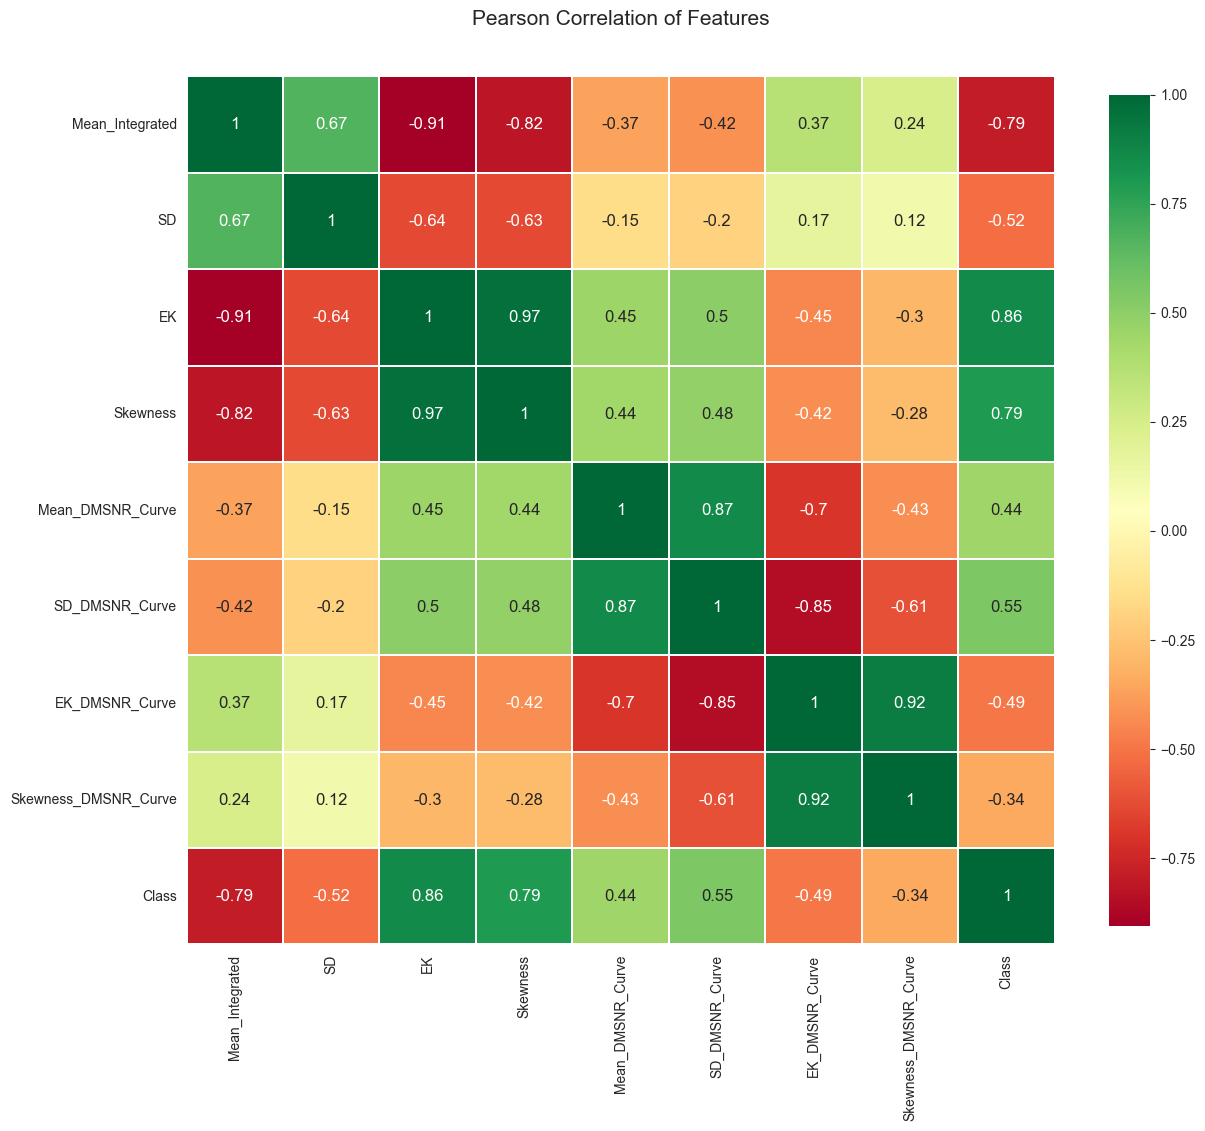

In [46]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "RdYlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

Text(0, 0.5, 'SD')

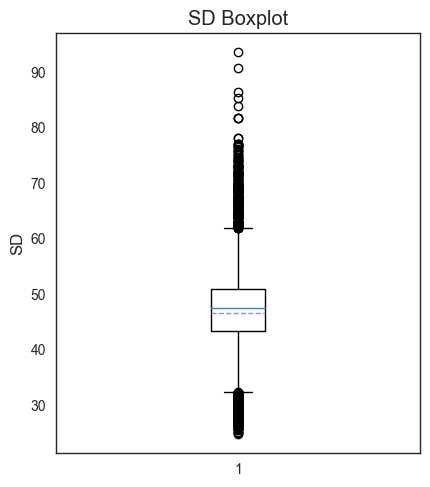

In [47]:
#graph distribution of quantitative data
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['SD'], showmeans = True, meanline = True)
plt.title('SD Boxplot')
plt.ylabel('SD')
